<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

# Keras in R <a class="tocSkip">

In [13]:
# example from https://keras.rstudio.com/articles/examples/mnist_mlp.html

library(keras)

In [14]:
# Define hyperparameters -----------

batch_size <- 128
num_classes <- 10
epochs <- 30

In [15]:
# Data Preparation -----------

# The data, shuffled and split between train and test sets
c(c(x_train, y_train), c(x_test, y_test)) %<-% dataset_mnist()

x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

# Transform RGB values into [0,1] range
x_train <- x_train / 255
x_test <- x_test / 255

cat(nrow(x_train), 'train samples\n')
cat(nrow(x_test), 'test samples\n')

# Convert class vectors to binary class matrices
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [16]:
# Define Model ---------------

model <- keras_model_sequential()
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

summary(model)

model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_26 (Dense)                    (None, 256)                     200960      
________________________________________________________________________________
dropout_14 (Dropout)                (None, 256)                     0           
________________________________________________________________________________
dense_27 (Dense)                    (None, 128)                     32896       
________________________________________________________________________________
dropout_15 (Dropout)                (None, 128)                     0           
________________________________________________________________________________
dense_28 (Dense)                    (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_____________________________________

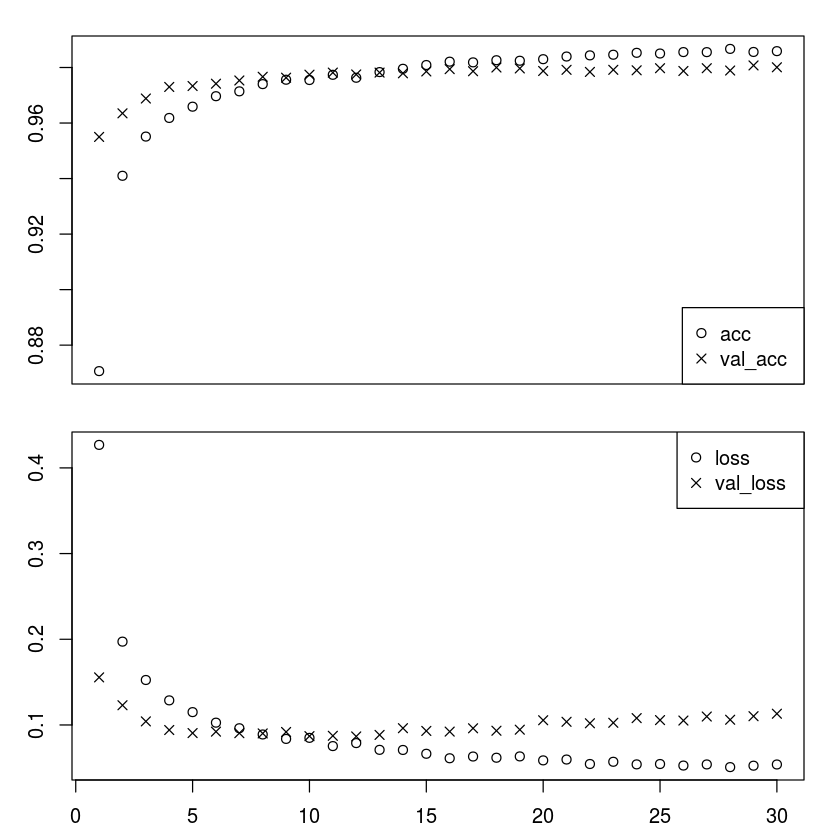

In [17]:
# Training the model --------
history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  verbose = 1,
  validation_split = 0.2
)

plot(history)

In [18]:
# Evaluate the model --------

score <- model %>% evaluate(
  x_test, y_test,
  verbose = 0
)

# Output metrics
cat('Test loss:', score[[1]], '\n')
cat('Test accuracy:', score[[2]], '\n')

Test loss: 0.1128517 
Test accuracy: 0.9816 
